Consider a polynomial function $Q = Q(X,Y)$ in two variables $X,Y$ with
coefficients in $\mathbb{R}$. Let's make two further assumptions on $Q$:

- suppose that $Q$ has degree $\le 2$, and
- suppose that $Q(0,0) = 0$.


Thus, $Q$ has the following form:

$$Q(X,Y) = a X + b Y + c X^2 + d XY + e Y^2$$

for constants $a,b,c,d,e \in \mathbb{R}$.

We wish to consider the curve in $\mathbb{R}^2$ defined by the
equation

$$Q(X,Y) = 1;$$

i.e. a *level curve* for the function $Q$.

For example, if $$Q_1(X,Y) = X^2 - Y^2 \quad \text{and} \quad
Q_2(X,Y) = \dfrac{X^2}{4} + \dfrac{Y^2}{9}$$ the
level curves $Q_1(X,Y) = 1$ and $Q_2(X,Y) = 1$ have
respectively the following graphs:



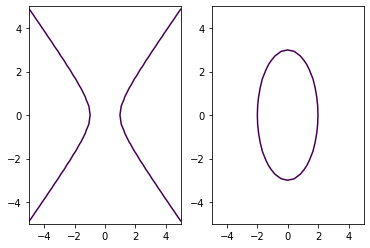

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from numpy.random import default_rng

rng = default_rng()

def draw_contours(fl,x,y,levels=[1]):
    X,Y = np.meshgrid(x,y)
    fig,axes = plt.subplots(1,len(fl))
    for ax,f in zip(axes,fl):
        ax.contour(X,Y,f(X,Y),levels)
    return fig


def Q1(x,y):
    return x**2 - y**2 


def Q2(x,y):
    return (1./4)*x**2 + (1./9)*y**2 


QL = [Q1,Q2]

af=draw_contours(QL, x=np.linspace(-5,5,25), y=np.linspace(-5,5,25))

Given points $(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)$ we seek to find
the coefficients of $Q$ such that the given points are approximately
*arranged along* the curve $Q(X,Y) = 1$. More precisely, we seek
coefficients such that $Q(x_i,y_i) \approx 1$ for all $i$.

a. Describe how to use the method of Linear Least Squares to estimate
   the coefficients $a,b,c,d,e$ of $Q$ using the given data
   $\{(x_i,y_i)\}_{i=1}^N$.

b. Find two sets of data ``R1`` and ``R2`` 

   Write code to implement the method you desribed in part a to
   estimate the coefficients of $Q_1(X,Y)$ and $Q_2(X,Y)$ as above for
   which the points in ``R1`` are arranged along the level curve
   $Q_1(X,Y) = 1$, and the points in ``R2`` are arranged along the
   level curve $Q_2(X,Y) =1$.

c. Use ``matplotlib`` to produce two plots:

   - a plot of the points in ``R1`` and the level curve $Q_1(X,Y) = 1$,
   
   - a plot of the points in ``R2`` and the level curve $Q_2(X,Y) = 1$,

   Be sure to include your graphs and the code used to produce them in
   your submission.

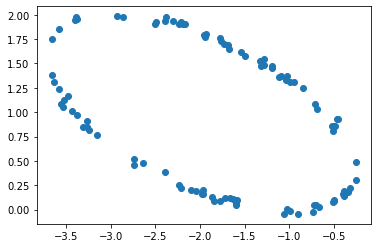

In [5]:
import numpy as np


R1 = np.array([[-3.65970082,  1.38127444],
               [-3.65706924,  1.75580748],
               [-3.62983649,  1.30742902],
               [-3.5769155,   1.85198084],
               [-3.57399781,  1.23852873],
               [-3.55828166,  1.08688333],
               [-3.53462198,  1.05337934],
               [-3.52623182,  1.12572771],
               [-3.47505588,  1.16442688],
               [-3.42860621,  1.00947016],
               [-3.40128508,  1.94411451],
               [-3.3836797,   1.97910832],
               [-3.38000184,  0.96963866],
               [-3.37883659,  1.95587529],
               [-3.30611977,  0.85208921],
               [-3.26420042,  0.91224011],
               [-3.2603302,   0.84813105],
               [-3.24539141,  0.81651473],
               [-3.14855175,  0.76286591],
               [-2.9290298,   1.98465009],
               [-2.8573439,   1.97969149],
               [-2.74240953,  0.4536522 ],
               [-2.73437988,  0.51946865],
               [-2.64061762,  0.48266519],
               [-2.50435494,  1.90132691],
               [-2.49079138,  1.92361854],
               [-2.39490837,  1.93160639],
               [-2.3872771,   0.38764243],
               [-2.37918796,  1.97454347],
               [-2.30226168,  1.93136351],
               [-2.23896867,  0.25122801],
               [-2.23798026,  1.90238011],
               [-2.21126893,  0.22509332],
               [-2.2108916,   1.92626795],
               [-2.18877173,  1.90851733],
               [-2.16331456,  1.90448748],
               [-2.09556972,  0.20333673],
               [-2.04413734,  0.18819777],
               [-1.97096677,  0.15579351],
               [-1.96901467,  0.15774208],
               [-1.96534331,  0.19810169],
               [-1.95364145,  1.78930688],
               [-1.94353208,  1.77063267],
               [-1.93448023,  1.80165582],
               [-1.86256672,  0.13205541],
               [-1.83846656,  0.09023899],
               [-1.77999527,  1.76235592],
               [-1.77712631,  0.08882162],
               [-1.75810392,  1.73080121],
               [-1.72619,     1.69747873],
               [-1.72047165,  0.11547414],
               [-1.67994938,  1.68940482],
               [-1.67869585,  1.64589396],
               [-1.66658237,  0.12312326],
               [-1.62359083,  0.1055116],
               [-1.59709003,  0.04863256],
               [-1.5965827,   0.07120183],
               [-1.58176085,  0.10026946],
               [-1.53498097,  1.61941993],
               [-1.49309048,  1.57531543],
               [-1.33161604,  1.52625088],
               [-1.31286966,  1.47174973],
               [-1.28339028,  1.48461929],
               [-1.2828002,   1.54426048],
               [-1.19419098,  1.45518069],
               [-1.19234419,  1.46581812],
               [-1.19068408,  1.47860221],
               [-1.10949865,  1.35991138],
               [-1.09178202,  1.37192411],
               [-1.05522871, -0.0432108],
               [-1.038317,    1.32882926],
               [-1.022141,    0.00400319],
               [-1.0220231,   1.37460876],
               [-0.99147731, -0.01827367],
               [-0.98522451,  1.31047402],
               [-0.95052445,  1.31464641],
               [-0.89641672, -0.04386355],
               [-0.84066702,  1.24450337],
               [-0.72741253, -0.02396654],
               [-0.72221928,  0.05172452],
               [-0.71424117,  1.08184386],
               [-0.7006887,   0.05025306],
               [-0.68942615,  1.03584956],
               [-0.6624686,   0.0285097],
               [-0.52277375,  0.86124378],
               [-0.50346486,  0.07443486],
               [-0.50331857,  0.80982417],
               [-0.50164555,  0.86281792],
               [-0.5012876,   0.09664541],
               [-0.50015289,  0.08761632],
               [-0.48104932,  0.85544165],
               [-0.46588305,  0.9295011],
               [-0.45664966,  0.92516615],
               [-0.39424574,  0.15787923],
               [-0.38989425,  0.13632372],
               [-0.38769473,  0.19375541],
               [-0.33829399,  0.18511653],
               [-0.31689879,  0.22238519],
               [-0.25326296,  0.30394601],
               [-0.24876939,  0.49034866]])

R2 = np.array([[-9.33927520e+00, -1.36104949e+00],
               [-9.26516163e+00, -1.36651645e+00],
               [-9.22945491e+00, -1.43738971e+00],
               [-9.10334589e+00, -1.36208168e+00],
               [-9.08031751e+00, -1.43643556e+00],
               [-9.00513765e+00, -1.35545663e+00],
               [-8.92405617e+00, -1.38551309e+00],
               [-8.80876697e+00, -1.33665826e+00],
               [-8.77859922e+00, -1.37590731e+00],
               [-8.71532646e+00, -1.35856978e+00],
               [-8.64616370e+00, -1.41869030e+00],
               [-8.41376249e+00, -1.39041572e+00],
               [-8.08954920e+00, -1.37814662e+00],
               [-7.67889886e+00, -1.38099434e+00],
               [-7.64503322e+00, -1.32352045e+00],
               [-7.62528074e+00, -1.38953925e+00],
               [-7.51901042e+00, -1.35101744e+00],
               [-7.31692834e+00, -1.31317055e+00],
               [-7.07217036e+00, -1.29984274e+00],
               [-6.74048086e+00, -1.36491588e+00],
               [-6.59664098e+00, -1.31432100e+00],
               [-6.45143017e+00, -1.30862626e+00],
               [-5.66463861e+00, -1.22723035e+00],
               [-5.11923862e+00, -1.21971008e+00],
               [-4.70036561e+00, -1.15498006e+00],
               [-4.65398508e+00, -1.23563784e+00],
               [-4.64772854e+00, -1.15586445e+00],
               [-4.40073807e+00, -1.19404717e+00],
               [-4.32315495e+00, -1.13887678e+00],
               [-4.23864189e+00, -1.16640736e+00],
               [-3.56460578e+00, -1.06058181e+00],
               [-3.44736020e+00, -1.09966930e+00],
               [-3.14166580e+00, -1.06635936e+00],
               [-2.87800430e+00, -1.04931787e+00],
               [-2.78456700e+00, -1.04404939e+00],
               [-2.41208765e+00, -9.17132457e-01],
               [-1.79285478e+00, -7.73134161e-01],
               [-1.59092169e+00, -7.48372629e-01],
               [-1.57129052e+00, -7.52226076e-01],
               [-1.54221811e+00, -7.42320200e-01],
               [-1.41209906e+00, -7.32434627e-01],
               [-1.38592779e+00, -7.27853924e-01],
               [-1.24172602e+00, -6.88928341e-01],
               [-1.13945056e+00, -6.48267836e-01],
               [-5.20585872e-01, -2.91483503e-01],
               [-3.84389286e-01, -2.63170634e-01],
               [-3.51826616e-01, -2.08599987e-01],
               [-2.90100349e-01, -1.45077120e-01],
               [-2.41133594e-01, -8.77914403e-02],
               [-2.20386254e-02,  1.33598963e-01],
               [ 2.22515727e-01,  4.14679375e-01],
               [ 2.58142901e-01,  3.75669259e-01],
               [ 6.22784413e-01,  1.08189631e+00],
               [ 8.72065765e-01,  2.23416384e+00],
               [ 1.15521618e+00,  4.19496594e+00],
               [ 1.15981100e+00,  4.19297030e+00],
               [ 1.24429486e+00,  4.87421873e+00],
               [ 1.31838970e+00,  6.86543201e+00],
               [ 1.32039285e+00,  6.96693083e+00],
               [ 1.74941406e+00, -6.90289917e+01],
               [ 1.77880017e+00, -3.01584076e+01],
               [ 1.79802875e+00, -1.87747241e+01],
               [ 1.83081480e+00, -1.94080015e+01],
               [ 2.02764808e+00, -1.10911863e+01],
               [ 2.13617892e+00, -8.46635848e+00],
               [ 2.77422831e+00, -4.37792970e+00],
               [ 3.16458392e+00, -3.59703927e+00],
               [ 3.81465314e+00, -3.05654264e+00],
               [ 3.83381827e+00, -3.03030865e+00],
               [ 3.97651912e+00, -2.92270720e+00],
               [ 4.14109550e+00, -2.82568736e+00],
               [ 4.19425286e+00, -2.80879810e+00],
               [ 4.19720200e+00, -2.81736841e+00],
               [ 4.36796582e+00, -2.77293162e+00],
               [ 4.59383835e+00, -2.68737072e+00],
               [ 4.67235389e+00, -2.70192217e+00],
               [ 4.97781063e+00, -2.50517210e+00],
               [ 5.28087125e+00, -2.44196008e+00],
               [ 5.35310616e+00, -2.45598260e+00],
               [ 5.77607832e+00, -2.39438086e+00],
               [ 6.66165438e+00, -2.21351272e+00],
               [ 6.73270321e+00, -2.27133137e+00],
               [ 6.85887700e+00, -2.23097667e+00],
               [ 6.99535560e+00, -2.24508412e+00],
               [ 7.03126396e+00, -2.26548852e+00],
               [ 7.51725556e+00, -2.14600727e+00],
               [ 7.76274390e+00, -2.14555218e+00],
               [ 8.04565391e+00, -2.15757927e+00],
               [ 8.06480127e+00, -2.13836119e+00],
               [ 8.49123635e+00, -2.07004600e+00],
               [ 8.55597168e+00, -2.08558253e+00],
               [ 8.67975356e+00, -2.04092505e+00],
               [ 8.84919469e+00, -2.06751432e+00],
               [ 9.01382492e+00, -2.09009253e+00],
               [ 9.05838899e+00, -2.04203281e+00],
               [ 9.20669262e+00, -2.10354543e+00],
               [ 9.25851461e+00, -2.02428403e+00],
               [ 9.28002660e+00, -2.02228028e+00],
               [ 9.31546192e+00, -2.06800930e+00],
               [ 9.88886365e+00, -2.06736047e+00]])

plt.plot(R1[:,0],R1[:,1],'o')

In [7]:
def quad_fit(R):
    # solve the least squares problem
    A = [[x[0], x[1], x[0]**2,x[0]*x[1],x[1]**2] for x in R]
    res=la.lstsq(A,np.ones(len(R)),rcond=None)

    # extract & report the coefficients
    a,b,c,d,e=res[0]
    print(f"Q(x) = {a:.03}*x + {b:.03}*y + {c:.03}*x^2 + {d:.03}*xy + {e:.03}*y^2")
    
    # return the quadratic function determined by these coefficients
    return lambda x,y: a*x+b*y+c*x**2+d*x*y+e*y**2

Q = quad_fit(R1)
Q2= quad_fit(R2)

Q(x) = -1.85*x + 1.69*y + -0.87*x^2 + -1.66*xy + -2.51*y^2


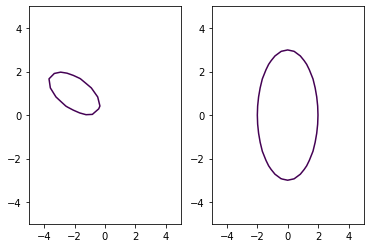

In [10]:
af=draw_contours([Q, Q2], x=np.linspace(-5,5,25), y=np.linspace(-5,5,25))